In [1]:
import lxml.html
import requests

In [2]:
html = requests.get("https://ja.wikipedia.org/wiki/アブラナ科")

In [3]:
print(html)

<Response [200]>


In [4]:
dom = lxml.html.fromstring(html.text)

In [5]:
print(dom.xpath('//*[@id="mw-content-text"]/div/ul[1]/li[1]/ul/li/i/span/a')[0].text)

Aethionema


In [6]:
genus = dom.xpath('//*[@id="mw-content-text"]/div/ul[1]/li/ul/li/i/span/a')

In [7]:
len(genus)

42

In [8]:
for i in genus:
    print(i.text)

Aethionema
Moriera
Arabidopsis
Camelina
Capsella
Cardamine
Armoracia
Barbarea
Nasturtium
Rorippa
Lepidium
Coronopus
Descurainia
Smelowskia
Alyssum
Aurinia
Lobularia
Sisymbrium
Brassica
Diplotaxis
Eruca
Raphanus
Hirschfeldia
Sinapis
Rapistrum
Orychophragmus
Isatis
Eutrema
Thlaspi
Arabis
Aubrieta
Draba
Macropodium
Noccaea
Iberis
Cochlearia
Cochlearia acaulis
Malcolmia
Matthiola
Hesperis
Chorispora
Lunaria


In [9]:
gtxt = []
for i in genus:
    gtxt.append(i.text)

In [10]:
print(sorted(gtxt))

['Aethionema', 'Alyssum', 'Arabidopsis', 'Arabis', 'Armoracia', 'Aubrieta', 'Aurinia', 'Barbarea', 'Brassica', 'Camelina', 'Capsella', 'Cardamine', 'Chorispora', 'Cochlearia', 'Cochlearia acaulis', 'Coronopus', 'Descurainia', 'Diplotaxis', 'Draba', 'Eruca', 'Eutrema', 'Hesperis', 'Hirschfeldia', 'Iberis', 'Isatis', 'Lepidium', 'Lobularia', 'Lunaria', 'Macropodium', 'Malcolmia', 'Matthiola', 'Moriera', 'Nasturtium', 'Noccaea', 'Orychophragmus', 'Raphanus', 'Rapistrum', 'Rorippa', 'Sinapis', 'Sisymbrium', 'Smelowskia', 'Thlaspi']


In [11]:
html = requests.get("https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?name=Brassicaceae")

In [12]:
print(html)

<Response [200]>


In [13]:
dom = lxml.html.fromstring(html.text)

In [8]:
print(list(dom.xpath('/html/body/form')[0]))

[<InputElement 10808cae8 name='mode' type='hidden'>, <!--  the header   -->, <Element table at 0x10808cb38>, <!--  the quicklinks bar   -->, <Element table at 0x10808cb88>, <!--  the query box   -->, <Element table at 0x10808cbd8>, <!--  the contents   -->, <Element title at 0x10808cc28>, <Element table at 0x10808cc78>, <Element a at 0x10808ccc8>, <Element small at 0x10808cd18>, <Element a at 0x10808cd68>, <Element a at 0x10808cdb8>, <Element a at 0x10808ce08>, <Element a at 0x10808ce58>, <Element a at 0x10808cea8>, <Element a at 0x10808cef8>, <Element a at 0x10808cf48>, <Element a at 0x10808cf98>, <Element a at 0x10808d048>, <Element a at 0x10808d098>, <Element a at 0x10808d0e8>, <Element a at 0x10808d138>, <Element a at 0x10808d188>, <Element a at 0x10808d1d8>, <Element a at 0x10808d228>, <Element a at 0x10808d278>, <Element a at 0x10808d2c8>, <Element ul at 0x10808d318>, <Element script at 0x10808d368>, <Element hr at 0x10808d3b8>, <Element p at 0x10808d408>, <Element br at 0x10808d

In [10]:
print(html.text)

<html>
  <head>
    <title>Taxonomy Browser</title>
    <meta name="author" content="taxonomy">
    <meta name="keywords" content="national center for biotechnology information, ncbi, national library of medicine, nlm, national institutes of health, nih, database, archive, bookshelf, pubmed, pubmed central, bioinformatics, biomedicine,taxonomy, organism, phylogeny, sequence, database">
    <meta name="description" content="THE NCBI Taxonomy database allows browsing of the taxonomy tree, which contains a classification of organisms.">
    <meta name="ncbi_app" content="taxonomy"/>
    <meta name="ncbi_phid" content="990C4D15A37222210000000000000001"/>
    <meta name="log_op" content="pageview"/>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <link rel="stylesheet" href="/corehtml/ncbi2.css">
    <!-- Global Alert message support -->
    <meta name="galert_type" content="default"/>
    <script type="text/javascript" src="/core/jquery/jquery-1.12.4.min.js">&#x

In [14]:
print(dom.xpath('//*[@title="genus"]/strong')[0].text)

Aethionema


In [15]:
genuses = dom.xpath('//*[@title="genus"]/strong')

In [16]:
genlist = []
for genus in genuses:
    genlist.append(genus.text)

In [17]:
print(len(genlist))

366


In [18]:
import pickle
with open("Brassicaceae/genuses.pickle", "wb")as fi:
    pickle.dump(genlist, fi)


In [19]:
with open("Brassicaceae/genuses.pickle", "rb")as fi:
    genlist2 = pickle.load(fi)
print(genlist == genlist2)

True


In [20]:
di = dom.xpath('//*[@type="disk"]')
for i in di:
    for k in list(i):
        if k.tag == "ul":
            break
    else:
        temp = i[0]
        while(temp.getparent()):
            try:
                if temp.attrib["title"] == "genus":
                    break
                else:
                    temp = temp.getparent()
                    print("genus")
            except:
                temp = temp.getparent()
        else:
            print(i.text_content())

In [21]:
ci = dom.xpath('//*[@type="circle"]')
for i in ci:
    for k in list(i):
        if k.tag == "ul":
            break
    else:
        temp = i
        flag = True
        while(temp.getparent() is not None):
            try:
                if temp.tag == "li":
                    if temp.xpath("a")[0].attrib["title"] == "genus":
                        flag = False
                        break
                    else:
                        temp = temp.getparent()
                else:
                    temp = temp.getparent()
                    # print("genus")
            except (KeyError, IndexError):
                temp = temp.getparent()
        else:
            print(i.text_content())

In [23]:
from classes2 import MCS_Finder
import os
import time
import pickle
import datetime
start = time.time()
with open("Brassicaceae/genuses.pickle", "rb")as fi:
    genlist = pickle.load(fi)
try:
    with open("Brassicaceae/genuses.pickle", "rb")as fi:
        genlist2 = pickle.load(fi)
    for genus in genlist:
        if not os.path.exists("Brassicaceae"):
            os.mkdir("Brassicaceae")
        if os.path.exists("Brassicaceae/" + genus):
            continue
        f = MCS_Finder(genus, "Brassicaceae")
        f.make_kcfs()
        time.sleep(15)
except:
    print(time.time() - start)
    print(datetime.datetime.now())
    raise
print(time.time() - start)
print(datetime.datetime.now())

0.0033321380615234375
2018-01-15 12:23:53.940291


In [24]:
print(genlist[-21])

Peltariopsis


抜き終わった

In [25]:
import os
print(len(os.listdir("Brassicaceae")))

368


In [26]:
import pickle
with open("Brassicaceae/genuses.pickle", "rb")as fi:
    genlist = pickle.load(fi)
print(len(genlist))

366


In [27]:
ari = []
for genus in os.listdir("Brassicaceae"):
    if genus == ".DS_Store" or genus == "others" or genus == "genuses.pickle":
        continue
    elif os.listdir("Brassicaceae/" + genus) == []:
        continue
    else:
        ari.append(genus)

In [28]:
print(len(ari)) 

95


In [113]:
di = dom.xpath('//*[@type="circle"]')

NameError: name 'dom' is not defined

In [114]:
for i in di:
    for k in list(i):
        if k.tag == "ul":
            break
    else:
        if i[0].attrib["title"] != "species":
            print(i.text_content())

NameError: name 'di' is not defined

In [29]:
print(ari)

['Aethionema', 'Alliaria', 'Alyssoides', 'Alyssum', 'Anastatica', 'Arabidopsis', 'Arabis', 'Armoracia', 'Asta', 'Aurinia', 'Barbarea', 'Berteroa', 'Biscutella', 'Boechera', 'Boreava', 'Bornmuellera', 'Brassica', 'Bunias', 'Cakile', 'Calepina', 'Camelina', 'Capsella', 'Cardamine', 'Carrichtera', 'Chorispora', 'Christolea', 'Cochlearia', 'Coincya', 'Conringia', 'Coronopus', 'Crambe', 'Crucihimalaya', 'Descurainia', 'Dimorphocarpa', 'Diplotaxis', 'Dithyrea', 'Draba', 'Enarthrocarpus', 'Erophila', 'Eruca', 'Erucaria', 'Erucastrum', 'Erysimum', 'Euzomodendron', 'Farsetia', 'Fibigia', 'Goldbachia', 'Guillenia', 'Heliophila', 'Hesperis', 'Hirschfeldia', 'Iberis', 'Isatis', 'Leavenworthia', 'Lepidium', 'Lobularia', 'Lunaria', 'Malcolmia', 'Matthiola', 'Moricandia', 'Nasturtiopsis', 'Nasturtium', 'Nerisyrenia', 'Neslia', 'Notoceras', 'Pachyphragma', 'Paysonia', 'Peltaria', 'Physaria', 'Pringlea', 'Pseuderucaria', 'Raphanus', 'Rapistrum', 'Rorippa', 'Rytidocarpus', 'Savignya', 'Schimpera', 'Scho

In [31]:
def get_all_cnumber_from_kcfs(genus):
    with open("Brassicaceae/" + genus + "/kcfs.kcfs")as f:
        Cnlist = []
        molecule = f.read().split("///\n")
        for mol in molecule[:-1]:
            Cn = mol.split("\n")[0].split()[1]
            Cnlist.append(Cn)
    return Cnlist

In [32]:
arilist = []
for genus in ari:
    arilist.append(get_all_cnumber_from_kcfs(genus))

In [33]:
kosuu = dict()
for Cnlist in arilist:
    for Cn in Cnlist:
        kosuu[Cn] = kosuu.get(Cn, 0) + 1

In [34]:
counter = 0
for i in kosuu.items():
    if i[1] > 1:
        print(i)
        counter += i[1] -1
print(len(kosuu)-counter)

('C00001221', 2)
('C00000034', 4)
('C00001434', 3)
('C00001468', 23)
('C00007329', 3)
('C00000053', 4)
('C00001232', 3)
('C00003672', 2)
('C00001473', 30)
('C00007844', 14)
('C00000181', 3)
('C00007814', 2)
('C00003047', 2)
('C00003647', 3)
('C00000677', 2)
('C00001487', 3)
('C00007864', 28)
('C00007818', 2)
('C00001435', 3)
('C00007853', 2)
('C00000101', 2)
('C00007586', 42)
('C00004631', 2)
('C00007340', 4)
('C00000130', 2)
('C00007824', 4)
('C00000037', 2)
('C00000005', 2)
('C00000019', 5)
('C00002674', 2)
('C00006674', 2)
('C00007529', 2)
('C00000207', 3)
('C00001474', 2)
('C00007808', 2)
('C00007832', 8)
('C00001224', 3)
('C00007355', 10)
('C00007356', 7)
('C00000126', 11)
('C00000001', 5)
('C00000131', 2)
('C00026995', 2)
('C00007350', 32)
('C00000105', 3)
('C00005557', 3)
('C00027108', 2)
('C00000096', 2)
('C00007353', 9)
('C00002777', 8)
('C00001228', 2)
('C00000020', 5)
('C00000008', 5)
('C00007801', 2)
('C00007345', 19)
('C00007845', 2)
('C00001463', 18)
('C00000100', 3)
('C0

In [35]:
sorted(kosuu.items(), reverse=True, key=lambda x: x[1])

[('C00007805', 54),
 ('C00007586', 42),
 ('C00001488', 36),
 ('C00007350', 32),
 ('C00001473', 30),
 ('C00001486', 29),
 ('C00007864', 28),
 ('C00001479', 27),
 ('C00007593', 24),
 ('C00007344', 24),
 ('C00007343', 24),
 ('C00001468', 23),
 ('C00007346', 23),
 ('C00007545', 21),
 ('C00007345', 19),
 ('C00007348', 19),
 ('C00001463', 18),
 ('C00007844', 14),
 ('C00001466', 14),
 ('C00000126', 11),
 ('C00000125', 11),
 ('C00007355', 10),
 ('C00007353', 9),
 ('C00007832', 8),
 ('C00002777', 8),
 ('C00007352', 8),
 ('C00007356', 7),
 ('C00000127', 6),
 ('C00007830', 6),
 ('C00001469', 6),
 ('C00000019', 5),
 ('C00000001', 5),
 ('C00000020', 5),
 ('C00000008', 5),
 ('C00007826', 5),
 ('C00000128', 5),
 ('C00002776', 5),
 ('C00001471', 5),
 ('C00000034', 4),
 ('C00000053', 4),
 ('C00007340', 4),
 ('C00007824', 4),
 ('C00000044', 4),
 ('C00000015', 4),
 ('C00036838', 4),
 ('C00000051', 4),
 ('C00000004', 4),
 ('C00000024', 4),
 ('C00000029', 4),
 ('C00001481', 4),
 ('C00007831', 4),
 ('C00001

In [36]:
total = 0
for i in kosuu.items():
    total += i[1]
print(total)

1777


In [37]:
kosuu2 = dict()
for genus in ari:
    with open("Brassicaceae/" + genus + "/splitedcount.txt")as f:
        units = f.read().split("\n")
        for unit in units[:-1]:
            temp = unit.split()
            kosuu2[(temp[1], temp[2])] = kosuu2.get((temp[1], temp[2]), 0) + int(temp[3])

In [38]:
sorted(kosuu2.items(), reverse=True, key=lambda x: x[1])

[(('RING', 'C-C-C-C-C-C'), 1334),
 (('RING', 'C-C-C-C-C-O'), 1236),
 (('SKELETON', 'C-C-C-C-C-C'), 1203),
 (('RING', 'C1-C1-C1-C1-C1-O2'), 1117),
 (('SKELETON', 'C1-C1-C1-C1-C1-C1'), 1093),
 (('RING', 'C1y-C1y-C1y-C1y-C1y-O2x'), 1086),
 (('SKELETON', 'C1b-C1y-C1y-C1y-C1y-C1y'), 1035),
 (('RING', 'C8-C8-C8-C8-C8-C8'), 841),
 (('INORGANIC', 'N-O-S(O)(O)-O'), 716),
 (('INORGANIC', 'N2-O2-S4(O1)(O1)-O1'), 715),
 (('INORGANIC', 'N2b-O2a-S4a(O1d)(O1d)-O1d'), 715),
 (('RING', 'C1-C1-C1-C1-C1-C1'), 340),
 (('SKELETON', 'C-C-C-C-C'), 316),
 (('RING', 'C-C-C-C-C'), 275),
 (('RING', 'C-C-C-C-C-C-C-C-C'), 252),
 (('RING', 'C-C-C-C-C-C-C-C-C-C'), 242),
 (('RING', 'C1-C1-C1-C1-C1-C1-C1-C1-C1'), 234),
 (('RING', 'C8x-C8y-C8x-C8y-C8y-C8y'), 214),
 (('SKELETON', 'C-C-C-C-C-C-C-C-C'), 205),
 (('RING', 'C-C-C-C-N'), 184),
 (('RING', 'C8x-C8x-C8y-C8x-C8y-C8y'), 180),
 (('SKELETON', 'C-C-C'), 172),
 (('RING', 'C8x-C8x-C8y-C8x-C8x-C8y'), 170),
 (('SKELETON', 'C-C-C-C'), 168),
 (('RING', 'C1-C1-C1-C1-C1'), 1

In [1]:
from classes2 import control_all_genus

In [2]:
cag = control_all_genus("Brassicaceae")

In [3]:
cag.ari

['Aethionema',
 'Alliaria',
 'Alyssoides',
 'Alyssum',
 'Anastatica',
 'Arabidopsis',
 'Arabis',
 'Armoracia',
 'Asta',
 'Aurinia',
 'Barbarea',
 'Berteroa',
 'Biscutella',
 'Boechera',
 'Boreava',
 'Bornmuellera',
 'Brassica',
 'Bunias',
 'Cakile',
 'Calepina',
 'Camelina',
 'Capsella',
 'Cardamine',
 'Carrichtera',
 'Chorispora',
 'Christolea',
 'Cochlearia',
 'Coincya',
 'Conringia',
 'Coronopus',
 'Crambe',
 'Crucihimalaya',
 'Descurainia',
 'Dimorphocarpa',
 'Diplotaxis',
 'Dithyrea',
 'Draba',
 'Enarthrocarpus',
 'Erophila',
 'Eruca',
 'Erucaria',
 'Erucastrum',
 'Erysimum',
 'Euzomodendron',
 'Farsetia',
 'Fibigia',
 'Goldbachia',
 'Guillenia',
 'Heliophila',
 'Hesperis',
 'Hirschfeldia',
 'Iberis',
 'Isatis',
 'Leavenworthia',
 'Lepidium',
 'Lobularia',
 'Lunaria',
 'Malcolmia',
 'Matthiola',
 'Moricandia',
 'Nasturtiopsis',
 'Nasturtium',
 'Nerisyrenia',
 'Neslia',
 'Notoceras',
 'Pachyphragma',
 'Paysonia',
 'Peltaria',
 'Physaria',
 'Pringlea',
 'Pseuderucaria',
 'Raphanus',

In [4]:
cag.get_number_of_Cnumber()

{'C00007816': 3,
 'C00007342': 1,
 'C00007321': 1,
 'C00002526': 1,
 'C00027106': 1,
 'C00007377': 1,
 'C00007548': 1,
 'C00007364': 1,
 'C00007795': 1,
 'C00000029': 4,
 'C00007552': 1,
 'C00007853': 2,
 'C00042747': 1,
 'C00003780': 1,
 'C00048487': 1,
 'C00001408': 1,
 'C00000938': 1,
 'C00007278': 1,
 'C00008991': 1,
 'C00006851': 1,
 'C00007470': 1,
 'C00029580': 1,
 'C00032165': 1,
 'C00007371': 1,
 'C00000816': 1,
 'C00001434': 3,
 'C00000186': 1,
 'C00000040': 1,
 'C00001138': 1,
 'C00000176': 3,
 'C00004565': 2,
 'C00007604': 1,
 'C00007306': 1,
 'C00003787': 1,
 'C00000152': 1,
 'C00006854': 1,
 'C00007662': 1,
 'C00048303': 1,
 'C00007419': 1,
 'C00000911': 2,
 'C00007386': 1,
 'C00013592': 1,
 'C00007445': 1,
 'C00023769': 1,
 'C00001477': 3,
 'C00001118': 1,
 'C00031285': 1,
 'C00004282': 1,
 'C00037061': 1,
 'C00007619': 1,
 'C00005996': 1,
 'C00007383': 1,
 'C00007570': 1,
 'C00007432': 1,
 'C00007269': 1,
 'C00034325': 1,
 'C00007429': 1,
 'C00004635': 1,
 'C00001161': 

In [5]:
sorted(cag.get_number_of_Cnumber().items(), reverse = True, key =lambda x: x[1]) 

[('C00007805', 54),
 ('C00007586', 42),
 ('C00001488', 36),
 ('C00007350', 32),
 ('C00001473', 30),
 ('C00001486', 29),
 ('C00007864', 28),
 ('C00001479', 27),
 ('C00007343', 24),
 ('C00007593', 24),
 ('C00007344', 24),
 ('C00007346', 23),
 ('C00001468', 23),
 ('C00007545', 21),
 ('C00007345', 19),
 ('C00007348', 19),
 ('C00001463', 18),
 ('C00007844', 14),
 ('C00001466', 14),
 ('C00000126', 11),
 ('C00000125', 11),
 ('C00007355', 10),
 ('C00007353', 9),
 ('C00007352', 8),
 ('C00007832', 8),
 ('C00002777', 8),
 ('C00007356', 7),
 ('C00001469', 6),
 ('C00000127', 6),
 ('C00007830', 6),
 ('C00000019', 5),
 ('C00000128', 5),
 ('C00000001', 5),
 ('C00001471', 5),
 ('C00000020', 5),
 ('C00000008', 5),
 ('C00007826', 5),
 ('C00002776', 5),
 ('C00000029', 4),
 ('C00000044', 4),
 ('C00007824', 4),
 ('C00000015', 4),
 ('C00000034', 4),
 ('C00000004', 4),
 ('C00000024', 4),
 ('C00007831', 4),
 ('C00000051', 4),
 ('C00036838', 4),
 ('C00001481', 4),
 ('C00007340', 4),
 ('C00000053', 4),
 ('C00007

In [6]:
kosuu12 = cag.get_number_of_Cnumber()
for x in kosuu:
    if kosuu[x] != kosuu12[x]:
        print(x)
        break
else:
    print("OK")

NameError: name 'kosuu' is not defined

In [7]:
cag.get_all_kcfs()

{('INORGANIC', 'O-Z'): 1,
 ('SKELETON', 'C1a-C8y-C8x-C8x-C8y-C8x-C8x'): 1,
 ('BOND', 'O1c-P1b'): 464,
 ('TRIPLET', 'C2y-C2y-O1a'): 4,
 ('VICINITY', 'C1d(C1a+C1b+C6a+O1a)'): 1,
 ('SKELETON',
  'C1a-C1c(C1b-C1b-C1b-C1c(C1a)-C1a)-C1b-C1b-C1b-C1c(C1a)-C1b-C1b-C1b-C2c(C1a)-C2b-C1b'): 4,
 ('TRIPLET', 'C1-C1-C2'): 1754,
 ('TRIPLET', 'C1d-O7a-C7a'): 2,
 ('TRIPLET', 'C1x-O7x-C7x'): 28,
 ('SKELETON', 'C1x-C1x-C1y-C1x-C1y-C1x-C1y'): 1,
 ('SKELETON', 'C1-C1-C1-C1-C1-C1-C1-C1-C1-C6'): 3,
 ('RING', 'C2x-C2x-C2x-C2x-C2y-C2y'): 1,
 ('TRIPLET', 'C2b-C2b-C2c'): 166,
 ('BOND', 'C8y-O1a'): 717,
 ('RING', 'C8x-C8x-C8y-C8x-C8x-N5x'): 1,
 ('ATOM', 'C8x'): 3215,
 ('RING', 'C1x-C1y-C1z-C1y-N1y'): 3,
 ('BOND', 'C8y-S4a'): 1,
 ('TRIPLET', 'C1y-C1z-C6a'): 54,
 ('SKELETON', 'C4-C6'): 1,
 ('ATOM', 'N2x'): 34,
 ('VICINITY', 'C2y(C1z+C2b+C2y)'): 17,
 ('TRIPLET', 'C1x-C1z-C1x'): 181,
 ('SKELETON', 'C6-C1-C1(C6)-C1-C6'): 2,
 ('TRIPLET', 'C1d-C5a-C2b'): 4,
 ('SKELETON', 'C(C)-C-C-C-C(C-C-C-C-C-C-C-C-C)-C-C-C-C-C(C)-C-C'

In [8]:
sorted(cag.get_split_kcfs().items(), reverse=True, key=lambda x: x[1])

[(('RING', 'C-C-C-C-C-C'), 1334),
 (('RING', 'C-C-C-C-C-O'), 1236),
 (('SKELETON', 'C-C-C-C-C-C'), 1203),
 (('RING', 'C1-C1-C1-C1-C1-O2'), 1117),
 (('SKELETON', 'C1-C1-C1-C1-C1-C1'), 1093),
 (('RING', 'C1y-C1y-C1y-C1y-C1y-O2x'), 1086),
 (('SKELETON', 'C1b-C1y-C1y-C1y-C1y-C1y'), 1035),
 (('RING', 'C8-C8-C8-C8-C8-C8'), 841),
 (('INORGANIC', 'N-O-S(O)(O)-O'), 716),
 (('INORGANIC', 'N2b-O2a-S4a(O1d)(O1d)-O1d'), 715),
 (('INORGANIC', 'N2-O2-S4(O1)(O1)-O1'), 715),
 (('RING', 'C1-C1-C1-C1-C1-C1'), 340),
 (('SKELETON', 'C-C-C-C-C'), 316),
 (('RING', 'C-C-C-C-C'), 275),
 (('RING', 'C-C-C-C-C-C-C-C-C'), 252),
 (('RING', 'C-C-C-C-C-C-C-C-C-C'), 242),
 (('RING', 'C1-C1-C1-C1-C1-C1-C1-C1-C1'), 234),
 (('RING', 'C8x-C8y-C8x-C8y-C8y-C8y'), 214),
 (('SKELETON', 'C-C-C-C-C-C-C-C-C'), 205),
 (('RING', 'C-C-C-C-N'), 184),
 (('RING', 'C8x-C8x-C8y-C8x-C8y-C8y'), 180),
 (('SKELETON', 'C-C-C'), 172),
 (('RING', 'C8x-C8x-C8y-C8x-C8x-C8y'), 170),
 (('SKELETON', 'C-C-C-C'), 168),
 (('RING', 'C1-C1-C1-C1-C1'), 1

In [9]:
specific = cag.get_specifics()

In [10]:
s = sorted(specific.items(), reverse=True, key=lambda x: x[1])

In [11]:
s

[(('TRIPLET', 'C1y-C1b-O2b'), (61, 'Arabidopsis')),
 (('TRIPLET', 'C1y-C1y-O2b'), (59, 'Arabidopsis')),
 (('TRIPLET', 'N4x-C8y-O5x'), (48, 'Arabidopsis')),
 (('TRIPLET', 'C1b-C1b-N1b'), (47, 'Arabidopsis')),
 (('TRIPLET', 'C-N-Z'), (44, 'Arabidopsis')),
 (('BOND', 'C1y-O2b'), (40, 'Arabidopsis')),
 (('TRIPLET', 'C1y-O2b-P1b'), (40, 'Arabidopsis')),
 (('TRIPLET', 'C8y-N4y-Z'), (34, 'Arabidopsis')),
 (('TRIPLET', 'C8-N4-Z'), (34, 'Arabidopsis')),
 (('TRIPLET', 'C1a-C1d-C1c'), (33, 'Arabidopsis')),
 (('RING', 'C-C-C-C-C-N-Z-N-C'), (33, 'Arabidopsis')),
 (('INORGANIC', 'O1-P1(O2)(O1)-O2-P1(O2)(O1)-O1'), (32, 'Arabidopsis')),
 (('TRIPLET', 'N-Z-N'), (31, 'Arabidopsis')),
 (('INORGANIC', 'O1c-P1b(O2b)(O1c)-O2c-P1b(O2b)(O1c)-O1c'),
  (31, 'Arabidopsis')),
 (('VICINITY', 'C(N+N+O)'), (30, 'Arabidopsis')),
 (('TRIPLET', 'C1x-C8y-N4x'), (26, 'Arabidopsis')),
 (('VICINITY', 'C8y(C1x+C8y+N4x)'), (26, 'Arabidopsis')),
 (('BOND', 'C1c-C5a'), (23, 'Arabidopsis')),
 (('TRIPLET', 'C1c-C5a-O5a'), (23, '

In [12]:
Cngenus = dict()
for genus in cag.ari:
    with open("Brassicaceae/" + genus + "/kcfs.kcfs")as fi:
        molecule = fi.read().split("///\n")
        Cngenus[genus] = len(molecule)

In [13]:
sorted(Cngenus.items(), reverse=True, key=lambda x: x[1])

[('Arabidopsis', 625),
 ('Brassica', 195),
 ('Raphanus', 79),
 ('Isatis', 56),
 ('Lepidium', 49),
 ('Erysimum', 42),
 ('Matthiola', 42),
 ('Hesperis', 37),
 ('Armoracia', 35),
 ('Sinapis', 32),
 ('Capsella', 29),
 ('Arabis', 27),
 ('Sisymbrium', 26),
 ('Descurainia', 22),
 ('Alyssum', 20),
 ('Thlaspi', 20),
 ('Thelypodium', 19),
 ('Diplotaxis', 18),
 ('Eruca', 17),
 ('Cakile', 16),
 ('Farsetia', 15),
 ('Moricandia', 15),
 ('Nerisyrenia', 13),
 ('Conringia', 12),
 ('Rorippa', 12),
 ('Crambe', 11),
 ('Iberis', 11),
 ('Boechera', 11),
 ('Lunaria', 11),
 ('Hirschfeldia', 10),
 ('Chorispora', 10),
 ('Aurinia', 10),
 ('Barbarea', 9),
 ('Draba', 9),
 ('Nasturtium', 9),
 ('Cardamine', 9),
 ('Thellungiella', 9),
 ('Physaria', 8),
 ('Rapistrum', 8),
 ('Sibara', 8),
 ('Malcolmia', 8),
 ('Biscutella', 8),
 ('Dithyrea', 8),
 ('Notoceras', 7),
 ('Schouwia', 7),
 ('Lobularia', 7),
 ('Cochlearia', 7),
 ('Carrichtera', 7),
 ('Peltaria', 7),
 ('Crucihimalaya', 7),
 ('Selenia', 7),
 ('Erucastrum', 7),
 (

In [14]:
print(cag.get_Cnumber_from_label("C-C-C-C-C-N-Z-N-C"))

{'Arabidopsis': ['C00001528', 'C00007316', 'C00007369', 'C00007372', 'C00007626']}


In [15]:
print(cag.get_Cnumber_from_label("C1y-C1b-O2b"))

{'Arabidopsis': ['C00001514', 'C00007223', 'C00007224', 'C00007229', 'C00007231', 'C00007237', 'C00007238', 'C00007239', 'C00007241', 'C00007244', 'C00007245', 'C00007246', 'C00007256', 'C00007257', 'C00007258', 'C00007259', 'C00007260', 'C00007264', 'C00007269', 'C00007270', 'C00007280', 'C00007281', 'C00007283', 'C00007296', 'C00007306', 'C00007307', 'C00007311', 'C00007313', 'C00007351', 'C00007354', 'C00007361', 'C00007377', 'C00007383', 'C00007384', 'C00007390', 'C00007394', 'C00007395', 'C00007396', 'C00007441', 'C00007445', 'C00007446', 'C00007447', 'C00007451', 'C00007454', 'C00007455', 'C00007456', 'C00007462', 'C00007537', 'C00007538', 'C00007555', 'C00007583', 'C00007584', 'C00007620', 'C00007621', 'C00007640', 'C00007662']}


In [16]:
print(cag.get_Cnumber_from_label("N4x-C8y-O5x"))

{'Arabidopsis': ['C00001514', 'C00007223', 'C00007228', 'C00007237', 'C00007238', 'C00007244', 'C00007245', 'C00007246', 'C00007248', 'C00007251', 'C00007252', 'C00007300', 'C00007301', 'C00007311', 'C00007313', 'C00007390', 'C00007396', 'C00007454', 'C00007455', 'C00007456', 'C00007583', 'C00007640', 'C00007662', 'C00007663', 'C00007664', 'C00007665']}


In [17]:
for S in s:
    if S[1][1] != "Arabidopsis":
        print(S)

(('SKELETON', 'C8-C8-C8-C8-C8-C8-C1-C8'), (12, 'Lepidium'))
(('VICINITY', 'C8y(C1b+N4x+N5x)'), (12, 'Lepidium'))
(('RING', 'C8x-C8x-N4x-C8y-N5x'), (12, 'Lepidium'))
(('TRIPLET', 'C1a-C1z-C5x'), (12, 'Iberis'))
(('TRIPLET', 'C1y-C1z-C5x'), (8, 'Iberis'))
(('TRIPLET', 'C2y-C2y-C8y'), (7, 'Isatis'))
(('TRIPLET', 'C1a-C8y-N4y'), (6, 'Lepidium'))
(('TRIPLET', 'C1b-N4y-C8y'), (6, 'Lepidium'))
(('TRIPLET', 'C8y-O2a-C8y'), (5, 'Lepidium'))
(('VICINITY', 'C1y(C1x+C1x+O2a)'), (5, 'Erysimum'))
(('VICINITY', 'C8y(C1a+C8y+N4y)'), (4, 'Lepidium'))
(('SKELETON', 'C8x-C8x-C8x-C8y-C8x-C8y-C1b-C8y'), (4, 'Lepidium'))
(('BOND', 'C1b-N4y'), (4, 'Lepidium'))
(('TRIPLET', 'C8y-C1b-N4y'), (4, 'Lepidium'))
(('SKELETON', 'C8x-C8x-C8x-C8x-C8y-C8y-C8y'), (4, 'Isatis'))
(('RING', 'C8y-C8y-C8y-N4y-C8y-N5x'), (4, 'Isatis'))
(('SKELETON', 'C8-C8-C8-C8-C8-C8-C8'), (4, 'Isatis'))
(('RING', 'C8-C8-C8-C8-C8-C8-N4-C8-N5-C8'), (4, 'Isatis'))
(('TRIPLET', 'C1x-O2x-C8y'), (4, 'Isatis'))
(('RING', 'C8x-C8x-C8x-C8x-C8y-C8y-N4

In [18]:
print(cag.get_Cnumber_from_label("C8y(C1b+N4x+N5x)"))

{}


In [19]:
print(cag.get_Cnumber_from_label("C8-C8-C8-C8-C8-C8-C1-C8"))

{'Lepidium': ['C00028459', 'C00028460', 'C00028461', 'C00028462', 'C00028463', 'C00028987', 'C00028988']}


In [20]:
print(cag.get_Cnumber_from_label("C8-C1-C8-C8-C8-C8-C8-C8"))

{}


In [21]:
print(cag.get_Cnumber_from_label("O1c-P1b(O2b)(O1c)-O2c-P1b(O2b)(O1c)-O1c"))

{'Arabidopsis': ['C00001514', 'C00007231', 'C00007237', 'C00007238', 'C00007244', 'C00007245', 'C00007246', 'C00007256', 'C00007257', 'C00007258', 'C00007259', 'C00007260', 'C00007264', 'C00007269', 'C00007270', 'C00007280', 'C00007281', 'C00007283', 'C00007354', 'C00007361', 'C00007390', 'C00007454', 'C00007455', 'C00007456', 'C00007462', 'C00007537', 'C00007538', 'C00007620', 'C00007621', 'C00007640', 'C00007662']}


In [22]:
print(len(cag.ari))

95


In [23]:
test = cag.get_Cnumber_from_label("C8-C8-C8-C8-C8-C8-C1-C8")

In [26]:
hanni = []
for i in range(1, 52):
    page = str(i)
    with open("../../../database/knapsack-kcf/KNApSAck" + page + ".kcf")as f1:
        clist = f1.read().split()
        hanni.append(clist[1])

import sys
sys.path.append("../../module")
from rdkit.Chem import rdDepictor
import kcf.converter as kcfco
from rdkit import Chem
mol_list = []
counter = 0
nCnumber = []
for z, i in enumerate(sorted(list(test.items())[0][1])):
    num = int(i[1:])
    for p, k in enumerate(hanni[1:]):
        k2 = int(k[1:])
        if k2 > num:
            k3 = str(p+1)
            with open("../../../database/knapsack-kcf/KNApSAck" + k3 + ".kcf")as f2:
                Clist = f2.read().split("///\n")
                try:
                    for C in Clist:
                        if i == C.split()[1]:
                            molblock = kcfco.kcf_to_molblock(C)
                            # print("OK", i)
                            # print(molblock[1])
                            mol = Chem.MolFromMolBlock(molblock[1])
                            if mol is None:
                                print("None", i, z, k3)
                                if "#+" in C or "#-" in C:
                                    print("Charge in\n")
                                counter += 1
                                break
                            # rdDepictor.Compute2DCoords(mol)
                            mol_list.append(mol)
                            nCnumber.append(i)
                            if "#+" in C or "#-" in C:
                                print(i, z, k3, "Charge in\n")
                            break
                except IndexError:
                    counter += 1
                    print("DAME", i, z)
            break
print(counter)

0


In [27]:
list(test.items())[0][1]

['C00028459',
 'C00028460',
 'C00028461',
 'C00028462',
 'C00028463',
 'C00028987',
 'C00028988']

In [28]:
print(mol_list)

[<rdkit.Chem.rdchem.Mol object at 0x10e3f2048>, <rdkit.Chem.rdchem.Mol object at 0x10e3f20b0>, <rdkit.Chem.rdchem.Mol object at 0x10e3f2118>, <rdkit.Chem.rdchem.Mol object at 0x10e3f2180>, <rdkit.Chem.rdchem.Mol object at 0x10e3f21e8>, <rdkit.Chem.rdchem.Mol object at 0x10e3f2250>, <rdkit.Chem.rdchem.Mol object at 0x10e3f22b8>]


In [29]:
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(mol_list, legends=sorted(list(test.items())[0][1]), subImgSize=(400, 400))
img.save("Brassi_test.png")

属中の種の数とか知りたい  
classes.toolsを作りたい。

In [30]:
print(cag.get_Cnumber_from_label("C1a-C1z-C5x"))

{'Iberis': ['C00003683', 'C00003685', 'C00003686', 'C00003689']}


In [31]:
from tools import search_all_Cnumber_from_label
from tools import get_genuses
from tools import get_name

In [32]:
ac = search_all_Cnumber_from_label("C1a-C1z-C5x")

In [35]:
print(len(ac[0]))

2028


In [36]:
ac2 = search_all_Cnumber_from_label("C8-C8-C8-C8-C8-C8-C1-C8")

In [75]:
print(len(ac2))

12


In [37]:
print(len(ac2[0]))

16


In [38]:
print(ac2)

(['C00002136', 'C00002167', 'C00002168', 'C00015387', 'C00015908', 'C00026233', 'C00026234', 'C00026235', 'C00026245', 'C00028459', 'C00028460', 'C00028461', 'C00028462', 'C00028463', 'C00028987', 'C00028988'], 21)


7/12がLepidiumに入っていた。

In [41]:
import time
name = []
for Cn in ac2[0]:
    time.sleep(5)
    name.append(get_genuses(Cn))
    print(Cn)
print(name)

C00002136
C00002167
C00002168
C00015387
C00015908
C00026233
C00026234
C00026235
C00026245
C00028459
C00028460
C00028461
C00028462
C00028463
C00028987
C00028988
[['Glycosmis arborea', 'Ruta graveolens', 'Zanthoxylum budrunga'], ['Glycosmis pentaphylla'], ['Glycosmis arborea', 'Glycosmis pentaphylla', 'Ruta sp.'], ['Melittangium lichenicola'], ['Streptomyces sp. AJ9561'], ['Pseudomonas sp.'], ['Pseudomonas sp.'], ['Pseudomonas sp.'], [], ['Lepidium satisvum', 'Lepidium sativum'], ['Lepidium satisvum', 'Lepidium sativum'], ['Lepidium satisvum', 'Lepidium sativum'], ['Lepidium satisvum', 'Lepidium sativum'], ['Lepidium satisvum', 'Lepidium sativum'], ['Lepidium satisvum', 'Lepidium sativum'], ['Lepidium satisvum', 'Lepidium sativum']]


In [43]:
ac2name = dict()
for x, y in zip(ac2[0], name):
    ac2name[x] = y
print(ac2name)

{'C00028988': ['Lepidium satisvum', 'Lepidium sativum'], 'C00002167': ['Glycosmis pentaphylla'], 'C00002168': ['Glycosmis arborea', 'Glycosmis pentaphylla', 'Ruta sp.'], 'C00026235': ['Pseudomonas sp.'], 'C00028463': ['Lepidium satisvum', 'Lepidium sativum'], 'C00026245': [], 'C00026234': ['Pseudomonas sp.'], 'C00015387': ['Melittangium lichenicola'], 'C00028459': ['Lepidium satisvum', 'Lepidium sativum'], 'C00028461': ['Lepidium satisvum', 'Lepidium sativum'], 'C00026233': ['Pseudomonas sp.'], 'C00015908': ['Streptomyces sp. AJ9561'], 'C00028462': ['Lepidium satisvum', 'Lepidium sativum'], 'C00028987': ['Lepidium satisvum', 'Lepidium sativum'], 'C00028460': ['Lepidium satisvum', 'Lepidium sativum'], 'C00002136': ['Glycosmis arborea', 'Ruta graveolens', 'Zanthoxylum budrunga']}


In [46]:
sorted(list(ac2name.items()))

[('C00002136',
  ['Glycosmis arborea', 'Ruta graveolens', 'Zanthoxylum budrunga']),
 ('C00002167', ['Glycosmis pentaphylla']),
 ('C00002168', ['Glycosmis arborea', 'Glycosmis pentaphylla', 'Ruta sp.']),
 ('C00015387', ['Melittangium lichenicola']),
 ('C00015908', ['Streptomyces sp. AJ9561']),
 ('C00026233', ['Pseudomonas sp.']),
 ('C00026234', ['Pseudomonas sp.']),
 ('C00026235', ['Pseudomonas sp.']),
 ('C00026245', []),
 ('C00028459', ['Lepidium satisvum', 'Lepidium sativum']),
 ('C00028460', ['Lepidium satisvum', 'Lepidium sativum']),
 ('C00028461', ['Lepidium satisvum', 'Lepidium sativum']),
 ('C00028462', ['Lepidium satisvum', 'Lepidium sativum']),
 ('C00028463', ['Lepidium satisvum', 'Lepidium sativum']),
 ('C00028987', ['Lepidium satisvum', 'Lepidium sativum']),
 ('C00028988', ['Lepidium satisvum', 'Lepidium sativum'])]

前の5つがlepidiumの持ってないやつ。  
さらに5つめは存在しなかった。  
しかもおそらく入力ミスでsatisvumは存在しない。

In [79]:
from tools import make_kcfs

In [80]:
print(test)

{'Lepidium': ['C00028459', 'C00028460', 'C00028461', 'C00028462', 'C00028463', 'C00028987', 'C00028988']}


In [81]:
test2 = list(test.values())[0]

In [82]:
make_kcfs(test2, "Brassicaceae/Lepidium/Lepidium")

True

In [83]:
path = "Brassicaceae/Lepidium/Lepidium"
kosuu = dict()
with open(path + "splitedcount.txt")as f:
    units = f.read().split("\n")
    for unit in units[:-1]:
        temp = unit.split()
        kosuu[(temp[1], temp[2])] = kosuu.get((temp[1], temp[2]),0) + int(temp[3])
print(kosuu)

{('SKELETON', 'C-C-C-C-C-C'): 2, ('RING', 'C8x-C8y-C8x-C8y-C8x-C8y'): 1, ('RING', 'C8x-C8x-C8y-C8x-C8y-C8y'): 5, ('SKELETON', 'C8x-C8y-C8x-C8y-C8x-C8y-C1b-C8y'): 1, ('RING', 'C-C-C-C-C-C'): 12, ('RING', 'C1-C1-C1-C1-C1-O2'): 2, ('SKELETON', 'C8-C8-C8-C8-C8-C8-C1-C8'): 12, ('SKELETON', 'C1-C1-C1-C1-C1-C1'): 2, ('SKELETON', 'C8x-C8x'): 12, ('RING', 'C8x-C8x-N4x-C8y-N5x'): 12, ('RING', 'C8-C8-C8-C8-C8-C8'): 12, ('SKELETON', 'C8x-C8y-C8x-C8x-C8y-C8y-C1b-C8y'): 2, ('RING', 'C8x-C8x-C8y-C8x-C8x-C8y'): 1, ('RING', 'C8x-C8x-C8x-C8y-C8x-C8y'): 4, ('RING', 'C8-C8-N4-C8-N5'): 12, ('SKELETON', 'C8-C8'): 12, ('RING', 'C-C-N-C-N'): 12, ('SKELETON', 'C8x-C8x-C8x-C8y-C8y-C8y-C1b-C8y'): 1, ('RING', 'C8x-C8x-C8x-C8y-C8y-C8y'): 1, ('SKELETON', 'C8x-C8x-C8y-C8y-C8x-C8y-C1b-C8y'): 3, ('SKELETON', 'C1b-C1y-C1y-C1y-C1y-C1y'): 2, ('SKELETON', 'C-C'): 12, ('SKELETON', 'C8x-C8x-C8x-C8y-C8x-C8y-C1b-C8y'): 4, ('SKELETON', 'C8x-C8x-C8y-C8x-C8x-C8y-C1b-C8y'): 1, ('RING', 'C1y-C1y-C1y-C1y-C1y-O2x'): 2, ('RING', 'C-C

In [84]:
sorted(kosuu.items(), reverse=True, key=lambda x: x[1])

[(('RING', 'C-C-C-C-C-C'), 12),
 (('SKELETON', 'C8-C8-C8-C8-C8-C8-C1-C8'), 12),
 (('SKELETON', 'C8x-C8x'), 12),
 (('RING', 'C8x-C8x-N4x-C8y-N5x'), 12),
 (('RING', 'C8-C8-C8-C8-C8-C8'), 12),
 (('RING', 'C8-C8-N4-C8-N5'), 12),
 (('SKELETON', 'C8-C8'), 12),
 (('RING', 'C-C-N-C-N'), 12),
 (('SKELETON', 'C-C'), 12),
 (('SKELETON', 'C-C-C-C-C-C-C-C'), 12),
 (('RING', 'C8x-C8x-C8y-C8x-C8y-C8y'), 5),
 (('RING', 'C8x-C8x-C8x-C8y-C8x-C8y'), 4),
 (('SKELETON', 'C8x-C8x-C8x-C8y-C8x-C8y-C1b-C8y'), 4),
 (('SKELETON', 'C8x-C8x-C8y-C8y-C8x-C8y-C1b-C8y'), 3),
 (('SKELETON', 'C-C-C-C-C-C'), 2),
 (('RING', 'C1-C1-C1-C1-C1-O2'), 2),
 (('SKELETON', 'C1-C1-C1-C1-C1-C1'), 2),
 (('SKELETON', 'C8x-C8y-C8x-C8x-C8y-C8y-C1b-C8y'), 2),
 (('SKELETON', 'C1b-C1y-C1y-C1y-C1y-C1y'), 2),
 (('RING', 'C1y-C1y-C1y-C1y-C1y-O2x'), 2),
 (('RING', 'C-C-C-C-C-O'), 2),
 (('RING', 'C8x-C8y-C8x-C8y-C8x-C8y'), 1),
 (('SKELETON', 'C8x-C8y-C8x-C8y-C8x-C8y-C1b-C8y'), 1),
 (('RING', 'C8x-C8x-C8y-C8x-C8x-C8y'), 1),
 (('SKELETON', 'C8x-C

共発現していそうなのはC8x-C8x-N4x-C8y-N5xとC8-C8-C8-C8-C8-C8-C1-C8である。

In [85]:
kyou = search_all_Cnumber_from_label("C8x-C8x-N4x-C8y-N5x")

In [86]:
for k in kyou:
    if not k in test["Lepidium"]:
        print(k)

C00026987
C00026988


In [87]:
import time
name2 = []
for Cn in ["C00026987", "C00026988"]:
    time.sleep(5)
    name2.append(get_genuses(Cn))
print(name2)

[['Hypsistozoa fasmeriana'], ['Hypsistozoa fasmeriana']]


In [88]:
res = []
label = "C8x-C8x-N4x-C8y-N5x"
for i in label.split("-"):
    res.append(i[:2])
lev2 = "-".join(res)
print(lev2)

C8-C8-N4-C8-N5


In [89]:
kyou2 = search_all_Cnumber_from_label(lev2)

In [90]:
print(kyou2)

['C00001414', 'C00002309', 'C00002355', 'C00002356', 'C00007479', 'C00007480', 'C00007495', 'C00011251', 'C00014887', 'C00015360', 'C00015572', 'C00015573', 'C00016368', 'C00016600', 'C00016601', 'C00016602', 'C00016740', 'C00016937', 'C00017072', 'C00017097', 'C00017938', 'C00017961', 'C00017962', 'C00017963', 'C00017964', 'C00017965', 'C00018152', 'C00018153', 'C00018300', 'C00018603', 'C00018738', 'C00018853', 'C00018854', 'C00019655', 'C00024790', 'C00025547', 'C00026526', 'C00026527', 'C00026528', 'C00026530', 'C00026566', 'C00026701', 'C00026793', 'C00026966', 'C00026967', 'C00026968', 'C00026987', 'C00026988', 'C00027033', 'C00027034', 'C00027036', 'C00027057', 'C00027726', 'C00027801', 'C00027817', 'C00027891', 'C00027898', 'C00027949', 'C00027957', 'C00028034', 'C00028035', 'C00028036', 'C00028118', 'C00028183', 'C00028304', 'C00028379', 'C00028411', 'C00028459', 'C00028460', 'C00028461', 'C00028462', 'C00028463', 'C00028474', 'C00028580', 'C00028633', 'C00028635', 'C00028636'

In [91]:
for i in test["Lepidium"]:
    if i not in kyou2:
        print(i)

何個か見てみたが、五員環のくっついている位置が違った。

In [92]:
import simnet2

In [93]:
import importlib
simnet2 = importlib.reload(simnet2)

In [77]:
Clist = test["Lepidium"]
print(Clist)

['C00028459', 'C00028460', 'C00028461', 'C00028462', 'C00028463', 'C00028987', 'C00028988']


In [95]:
simnet2.get_simcomp(Clist)

True

7/7
edge:9


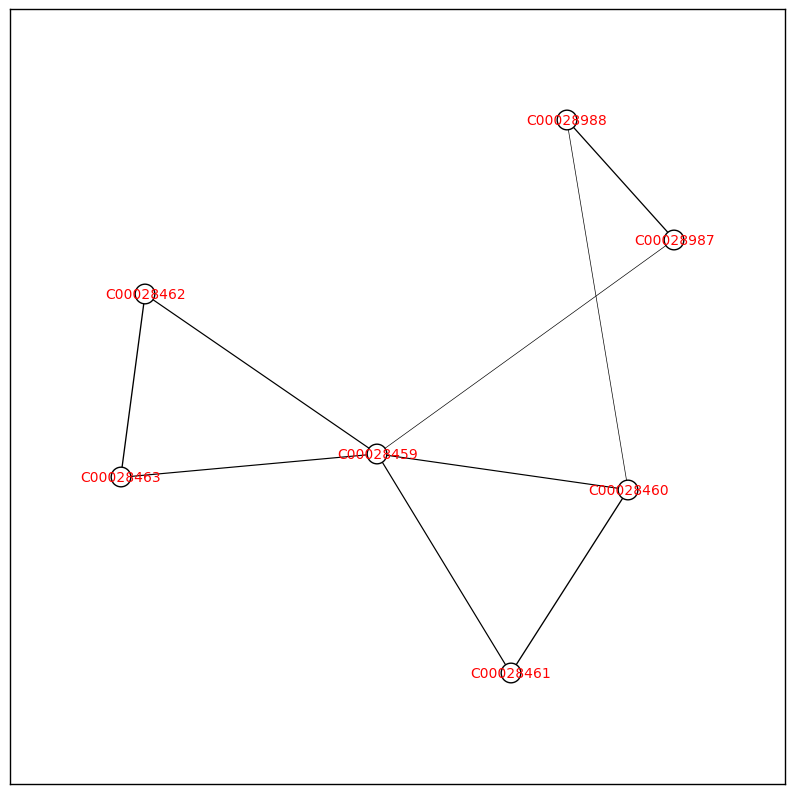

In [78]:
%matplotlib inline
simnet2.make_graph(Clist, mode=0, lim=0.8)

In [103]:
for i in Clist:
    print("http://rest.genome.jp/simcomp/" + i + "/knapsack/cutoff=0.8")

http://rest.genome.jp/simcomp/C00028459/knapsack/cutoff=0.8
http://rest.genome.jp/simcomp/C00028460/knapsack/cutoff=0.8
http://rest.genome.jp/simcomp/C00028461/knapsack/cutoff=0.8
http://rest.genome.jp/simcomp/C00028462/knapsack/cutoff=0.8
http://rest.genome.jp/simcomp/C00028463/knapsack/cutoff=0.8
http://rest.genome.jp/simcomp/C00028987/knapsack/cutoff=0.8
http://rest.genome.jp/simcomp/C00028988/knapsack/cutoff=0.8


In [49]:
s

[(('TRIPLET', 'C1y-C1b-O2b'), (61, 'Arabidopsis')),
 (('TRIPLET', 'C1y-C1y-O2b'), (59, 'Arabidopsis')),
 (('TRIPLET', 'N4x-C8y-O5x'), (48, 'Arabidopsis')),
 (('TRIPLET', 'C1b-C1b-N1b'), (47, 'Arabidopsis')),
 (('TRIPLET', 'C-N-Z'), (44, 'Arabidopsis')),
 (('BOND', 'C1y-O2b'), (40, 'Arabidopsis')),
 (('TRIPLET', 'C1y-O2b-P1b'), (40, 'Arabidopsis')),
 (('TRIPLET', 'C8y-N4y-Z'), (34, 'Arabidopsis')),
 (('TRIPLET', 'C8-N4-Z'), (34, 'Arabidopsis')),
 (('TRIPLET', 'C1a-C1d-C1c'), (33, 'Arabidopsis')),
 (('RING', 'C-C-C-C-C-N-Z-N-C'), (33, 'Arabidopsis')),
 (('INORGANIC', 'O1-P1(O2)(O1)-O2-P1(O2)(O1)-O1'), (32, 'Arabidopsis')),
 (('TRIPLET', 'N-Z-N'), (31, 'Arabidopsis')),
 (('INORGANIC', 'O1c-P1b(O2b)(O1c)-O2c-P1b(O2b)(O1c)-O1c'),
  (31, 'Arabidopsis')),
 (('VICINITY', 'C(N+N+O)'), (30, 'Arabidopsis')),
 (('TRIPLET', 'C1x-C8y-N4x'), (26, 'Arabidopsis')),
 (('VICINITY', 'C8y(C1x+C8y+N4x)'), (26, 'Arabidopsis')),
 (('BOND', 'C1c-C5a'), (23, 'Arabidopsis')),
 (('TRIPLET', 'C1c-C5a-O5a'), (23, '

In [50]:
for S in s:
    if S[1][1] == "Brassica":
        print(S)

(('BOND', 'C2c-S0'), (4, 'Brassica'))
(('TRIPLET', 'N1b-C2c-S2a'), (4, 'Brassica'))
(('TRIPLET', 'N1b-C2c-S0'), (4, 'Brassica'))
(('TRIPLET', 'S0-C2c-S2a'), (4, 'Brassica'))
(('VICINITY', 'C2c(N1b+S0+S2a)'), (4, 'Brassica'))
(('TRIPLET', 'N5x-C8x-S2x'), (2, 'Brassica'))
(('TRIPLET', 'C4a-C1b-C8y'), (2, 'Brassica'))
(('TRIPLET', 'C1b-C8y-S2x'), (2, 'Brassica'))
(('RING', 'C8-N5-C8-C8-S2'), (2, 'Brassica'))
(('VICINITY', 'C1y(C1y+C1y+C2x)'), (2, 'Brassica'))
(('VICINITY', 'C1y(C1c+C1x+C1y)'), (2, 'Brassica'))
(('SKELETON', 'C1-C8-C8-C1-C1'), (2, 'Brassica'))
(('TRIPLET', 'C4-C1-C8'), (2, 'Brassica'))
(('RING', 'C1x-C1x-C1y-C1y-C2x-C2y-C1x-C1x-C1y-C1z'), (2, 'Brassica'))
(('RING', 'C1x-C1x-C1y-C1y-C2x-C2y'), (2, 'Brassica'))
(('VICINITY', 'C8y(C1b+C8y+S2x)'), (2, 'Brassica'))
(('TRIPLET', 'C1-C8-S2'), (2, 'Brassica'))
(('SKELETON', 'C1b-C1c-C8y-C8x-C8x-C8y-C8y-C8x'), (2, 'Brassica'))
(('SKELETON', 'C1a-C8y-C8y-C1b-C1b'), (2, 'Brassica'))
(('TRIPLET', 'C1z-N4y-C8y'), (2, 'Brassica'))
(('VI

In [53]:
CnB = cag.get_Cnumber_from_label("N1b-C2c-S2a")

In [54]:
print(CnB)

{'Brassica': ['C00001546', 'C00027106', 'C00036583', 'C00037061']}


In [51]:
ac3 = search_all_Cnumber_from_label("N1b-C2c-S2a")

In [52]:
print(ac3)

(['C00001546', 'C00017854', 'C00017855', 'C00027106', 'C00036583', 'C00037061', 'C00045424', 'C00045427'], 8)


In [65]:
hanni = []
for i in range(1, 52):
    page = str(i)
    with open("../../../database/knapsack-kcf/KNApSAck" + page + ".kcf")as f1:
        clist = f1.read().split()
        hanni.append(clist[1])

import sys
sys.path.append("../../module")
from rdkit.Chem import rdDepictor
import kcf.converter as kcfco
from rdkit import Chem
mol_list = []
counter = 0
nCnumber = []
for z, i in enumerate(sorted(list(CnB.items())[0][1])):
    num = int(i[1:])
    for p, k in enumerate(hanni[1:]):
        k2 = int(k[1:])
        if k2 > num:
            k3 = str(p+1)
            with open("../../../database/knapsack-kcf/KNApSAck" + k3 + ".kcf")as f2:
                Clist = f2.read().split("///\n")
                try:
                    for C in Clist:
                        if i == C.split()[1]:
                            molblock = kcfco.kcf_to_molblock(C)
                            # print("OK", i)
                            # print(molblock[1])
                            mol = Chem.MolFromMolBlock(molblock[1])
                            if mol is None:
                                print("None", i, z, k3)
                                if "#+" in C or "#-" in C:
                                    print("Charge in\n")
                                counter += 1
                                break
                            rdDepictor.Compute2DCoords(mol)
                            mol_list.append(mol)
                            nCnumber.append(i)
                            if "#+" in C or "#-" in C:
                                print(i, z, k3, "Charge in\n")
                            break
                except IndexError:
                    counter += 1
                    print("DAME", i, z)
            break
print(counter)

0


In [66]:
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(mol_list, legends=sorted(list(CnB.items())[0][1]), subImgSize=(400, 400))
img.save("dotpng/Brassi_test2.png")

In [67]:
hanni = []
for i in range(1, 52):
    page = str(i)
    with open("../../../database/knapsack-kcf/KNApSAck" + page + ".kcf")as f1:
        clist = f1.read().split()
        hanni.append(clist[1])

import sys
sys.path.append("../../module")
from rdkit.Chem import rdDepictor
import kcf.converter as kcfco
from rdkit import Chem
mol_list = []
counter = 0
nCnumber = []
for z, i in enumerate(sorted(ac3[0])):
    num = int(i[1:])
    for p, k in enumerate(hanni[1:]):
        k2 = int(k[1:])
        if k2 > num:
            k3 = str(p+1)
            with open("../../../database/knapsack-kcf/KNApSAck" + k3 + ".kcf")as f2:
                Clist = f2.read().split("///\n")
                try:
                    for C in Clist:
                        if i == C.split()[1]:
                            molblock = kcfco.kcf_to_molblock(C)
                            # print("OK", i)
                            # print(molblock[1])
                            mol = Chem.MolFromMolBlock(molblock[1])
                            if mol is None:
                                print("None", i, z, k3)
                                if "#+" in C or "#-" in C:
                                    print("Charge in\n")
                                counter += 1
                                break
                            rdDepictor.Compute2DCoords(mol)
                            mol_list.append(mol)
                            nCnumber.append(i)
                            if "#+" in C or "#-" in C:
                                print(i, z, k3, "Charge in\n")
                            break
                except IndexError:
                    counter += 1
                    print("DAME", i, z)
            break
print(counter)

0


In [68]:
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(mol_list, legends=sorted(ac3[0]), subImgSize=(400, 400))
img.save("dotpng/Brassi_test3.png")

In [69]:
import simnet2

In [74]:
print(list(CnB.items())[0][1])

['C00001546', 'C00027106', 'C00036583', 'C00037061']


In [75]:
simnet2.get_simcomp(list(CnB.items())[0][1], "SIMCOMP2/Brassi_test.txt")

True

4/4
edge:5


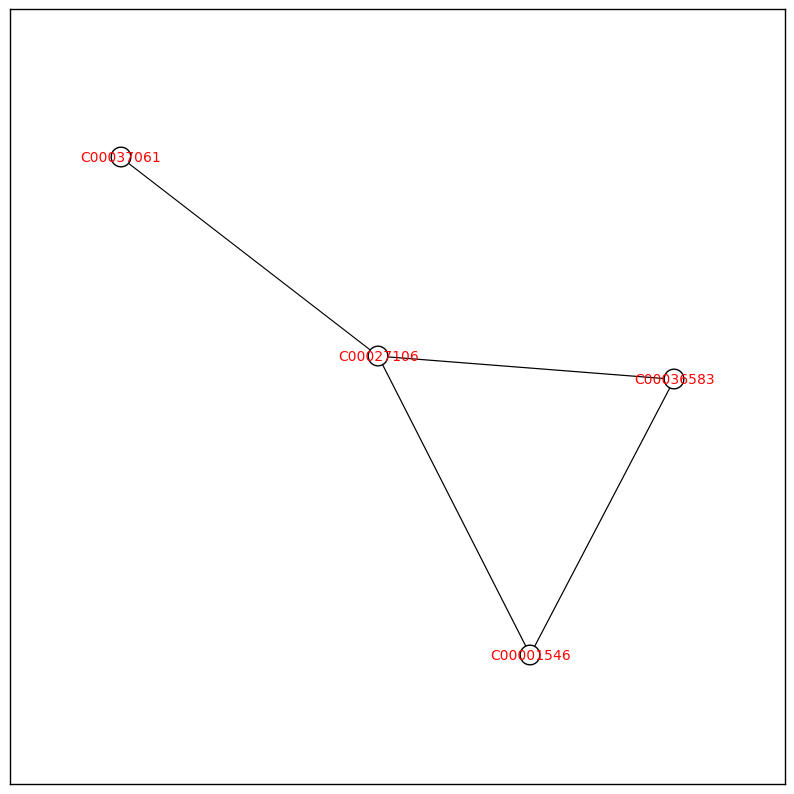

In [95]:
%matplotlib inline
simnet2.make_graph(sorted(list(CnB.items())[0][1]), mode=1, lim=0.8, filepath="SIMCOMP2/Brassi_test.txt")

In [81]:
sorted(list(CnB.items())[0][1])

['C00001546', 'C00027106', 'C00036583', 'C00037061']

In [94]:
import importlib
importlib.reload(simnet2)

<module 'simnet2' from '/Users/satoumasakimiyuki/GitHub/KNApSAcK_search/new_version/simnet2.py'>

In [96]:
import time
name = []
for Cn in sorted(list(CnB.items())[0][1]):
    time.sleep(5)
    name.append(get_genuses(Cn))
    print(Cn)
print(name)

C00001546
C00027106
C00036583
C00037061
[['Brassica campestris', 'Brassica carinata', 'Brassica napus', 'Brassica oleracea', 'Brassica rapa', 'Brassica sativus'], ['Brassica campestris L.subsp.pekinensis.', 'Brassica napa', 'Brassica napus L.ssp.rapifera', 'Brassica oleracea', 'Brassica rapa', 'Brassica sativus'], ['Brassica oleracea', 'Brassica rapa'], ['Brassica oleracea']]


In [97]:
name

[['Brassica campestris',
  'Brassica carinata',
  'Brassica napus',
  'Brassica oleracea',
  'Brassica rapa',
  'Brassica sativus'],
 ['Brassica campestris L.subsp.pekinensis.',
  'Brassica napa',
  'Brassica napus L.ssp.rapifera',
  'Brassica oleracea',
  'Brassica rapa',
  'Brassica sativus'],
 ['Brassica oleracea', 'Brassica rapa'],
 ['Brassica oleracea']]

In [1]:
import tools

In [2]:
tools.search_all_Cnumber_from_label("N1b-C2c-S2a")

(['C00001546',
  'C00017854',
  'C00017855',
  'C00027106',
  'C00036583',
  'C00037061',
  'C00045424',
  'C00045427'],
 8)

In [3]:
temp = tools.search_all_Cnumber_from_label("N1b-C2c-S2a")

In [5]:
import time
k = []
for i in temp[0]:
    k.append(tools.get_genuses(i))
    time.sleep(5)
print(k)

[['Brassica campestris', 'Brassica carinata', 'Brassica napus', 'Brassica oleracea', 'Brassica rapa', 'Brassica sativus'], ['Streptomyces paulus strain No.273'], ['Streptomyces paulus strain No.273'], ['Brassica campestris L.subsp.pekinensis.', 'Brassica napa', 'Brassica napus L.ssp.rapifera', 'Brassica oleracea', 'Brassica rapa', 'Brassica sativus'], ['Brassica oleracea', 'Brassica rapa'], ['Brassica oleracea'], ['Tridentata marginata'], ['Tridentata marginata']]


In [6]:
for i1, i2 in zip(k, temp[0]):
    print(i2)
    print(i1, "\n")

C00001546
['Brassica campestris', 'Brassica carinata', 'Brassica napus', 'Brassica oleracea', 'Brassica rapa', 'Brassica sativus'] 

C00017854
['Streptomyces paulus strain No.273'] 

C00017855
['Streptomyces paulus strain No.273'] 

C00027106
['Brassica campestris L.subsp.pekinensis.', 'Brassica napa', 'Brassica napus L.ssp.rapifera', 'Brassica oleracea', 'Brassica rapa', 'Brassica sativus'] 

C00036583
['Brassica oleracea', 'Brassica rapa'] 

C00037061
['Brassica oleracea'] 

C00045424
['Tridentata marginata'] 

C00045427
['Tridentata marginata'] 

